# Exploratory data analysis of the Abalone data set

## About the Abalone dataset

The dataset used in this project comes from an original study "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", created by Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and Wes B Ford (1994). It was sourced from the UCI Machine Learning Repository and can be found [here](http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/). Each row in the data set represents an abalone, including the physical measurements(Sex, Length, Diameter, Height, Whole weight, etc.) and the number of rings, which gives the age in years by adding 1.5. The missing values in the original study have been removed and the range of continuous values has been scaled. Please find the detailed information [here](http://archive.ics.uci.edu/ml/datasets/Abalone?pagewanted=all).

## 0. Setting up

### 0.1 Import Packages

In [1]:
import numpy as np
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

### 0.2 Import Raw Data and Preprocessing

In [2]:
# original dataset
abalone = pd.read_csv("../../data/raw/abalone.csv")

# add columns' titles to the dataframe
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole Weight",
    "Shucked Weight",
    "Viscera Weight",
    "Shell Weight",
    "Rings",
]

# transform the columm `Rings` to `Age` by adding 1.5 (according to the dataset description file)
abalone["Age"] = abalone["Rings"] + 1.5
abalone = abalone.drop(columns="Rings")

# split the dataset to train set and test set
train_df, test_df = train_test_split(abalone, test_size=0.2, random_state=123)

## 1. Exploratory analysis on the training data set

### 1.1 Check Missing Values

By looking at the train dataset, we can see that there aren't any missing values in the training data.

In [3]:
train_df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

### 1.2 Attribute Information

In [4]:
train_df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
2746,I,0.490,0.365,0.125,0.5585,0.2520,0.1260,0.1615,11.5
853,M,0.570,0.435,0.130,0.7535,0.3490,0.1755,0.1940,11.5
1809,M,0.645,0.500,0.160,1.3815,0.6720,0.3260,0.3150,10.5
3419,F,0.595,0.475,0.165,1.1480,0.4440,0.2140,0.3700,11.5
1199,F,0.720,0.550,0.200,1.9965,0.9035,0.4690,0.5215,11.5


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3340 entries, 2746 to 3582
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3340 non-null   object 
 1   Length          3340 non-null   float64
 2   Diameter        3340 non-null   float64
 3   Height          3340 non-null   float64
 4   Whole Weight    3340 non-null   float64
 5   Shucked Weight  3340 non-null   float64
 6   Viscera Weight  3340 non-null   float64
 7   Shell Weight    3340 non-null   float64
 8   Age             3340 non-null   float64
dtypes: float64(8), object(1)
memory usage: 260.9+ KB


> Except `Sex`, all features and the target column `Age` are numeric.

>  Description of each of the attributes:

- **Sex**: M, F, and I (infant)
- **Length**: Longest shell measurement in mm
- **Diameter**: perpendicular to length in mm
- **Height**: with meat in shell in mm
- **Whole Weight**: whole abalone in grams
- **Shucked Weight**: weight of meat in grams
- **Viscera Weight**: gut weight (after bleeding) in grams
- **Shell Weight**: grams after being dried in grams
- **Age**: age in years

In [6]:
train_df.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000
mean,0.524368,0.408308,0.139644,0.831512,0.360678,0.181134,0.239582,11.445808
std,0.120470,0.099507,0.042316,0.492492,0.222257,0.110089,0.139768,3.240171
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.440500,0.185000,0.092500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.801750,0.336000,0.170000,0.235000,11.500000
75%,0.615000,0.480000,0.165000,1.165125,0.505500,0.256000,0.330000,12.500000
max,0.815000,0.650000,1.130000,2.555000,1.253000,0.641500,1.005000,30.500000


### 1.3 Exploration of the target `Age`

#### 1). Distribution of Target Column: 'Age'

<AxesSubplot:xlabel='Age (Years)', ylabel='Count'>

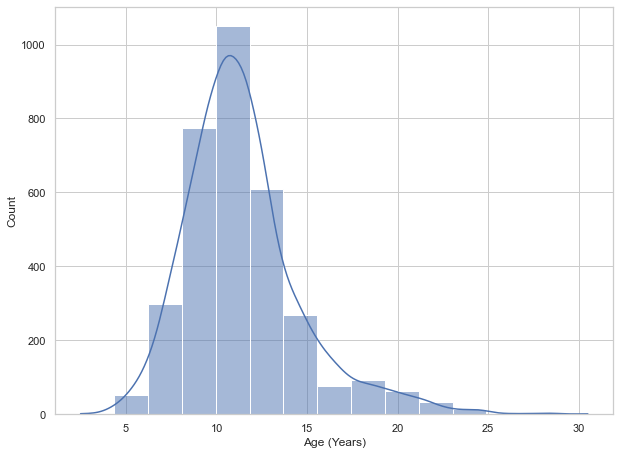

In [7]:
train_df1 = train_df.copy()
train_df1.columns = [
    "Sex",
    "Length (mm)",
    "Diameter (mm)",
    "Height (mm)",
    "Whole Weight (g)",
    "Shucked Weight (g)",
    "Viscera Weight (g)",
    "Shell Weight (g)",
    "Age (Years)",
]
sns.set(rc={"figure.figsize": (10, 7.5)}, font_scale=1.25)
sns.set_theme(style="whitegrid")
sns.histplot(train_df1, x="Age (Years)", kde=True, bins=15)

The distribution of `Age` is approximately normal with a mean of around 11.5 years. However, it does have a slight right skewness.

#### 2). Distribution of 'Age' conditioned on 'Sex':

In [9]:
train_df1

,Sex,Length (mm),Diameter (mm),Height (mm),Whole Weight (g),Shucked Weight (g),Viscera Weight (g),Shell Weight (g),Age (Years)
2746,I,0.490,0.365,0.125,0.5585,0.2520,0.1260,0.1615,11.5
853,M,0.570,0.435,0.130,0.7535,0.3490,0.1755,0.1940,11.5
1809,M,0.645,0.500,0.160,1.3815,0.6720,0.3260,0.3150,10.5
3419,F,0.595,0.475,0.165,1.1480,0.4440,0.2140,0.3700,11.5
1199,F,0.720,0.550,0.200,1.9965,0.9035,0.4690,0.5215,11.5
...,...,...,...,...,...,...,...,...,...
1593,I,0.525,0.400,0.140,0.6540,0.3050,0.1600,0.1690,8.5
4060,M,0.620,0.465,0.145,0.9110,0.3750,0.2145,0.2780,11.5
1346,I,0.590,0.445,0.135,0.7715,0.3280,0.1745,0.2300,10.5
3454,M,0.600,0.475,0.155,1.1385,0.5020,0.2295,0.3100,10.5


[Text(0, 0, 'Infant'), Text(0, 1, 'Male'), Text(0, 2, 'Female')]

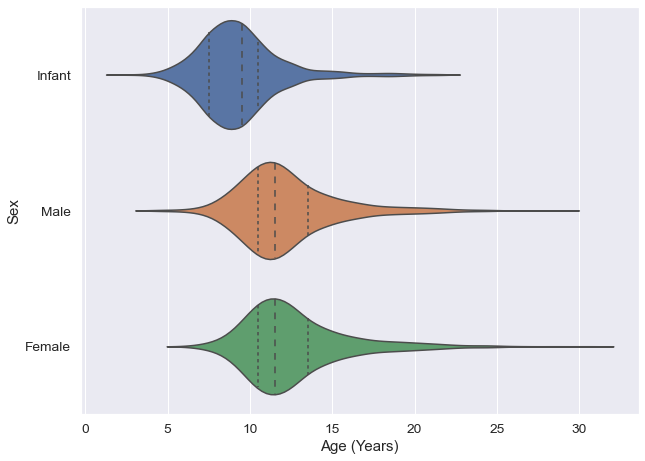

In [20]:
fig, ax = plt.subplots()

sns.set(rc={"figure.figsize": (10, 7.5)}, font_scale=1.25)

sns.violinplot(y="Sex", x="Age (Years)", data=train_df1, inner="quartile")

ax.set_yticklabels(["Infant", "Male", "Female"])

# ax.set_yticklabels(target_names)

In [9]:
df_i = train_df1.loc[train_df1["Sex"] == "I"]
df_m = train_df1.loc[train_df1["Sex"] == "M"]
df_f = train_df1.loc[train_df1["Sex"] == "F"]
summary = pd.concat(
    [
        train_df.describe()["Age"],
        df_i[["Age (Years)"]].describe(),
        df_m[["Age (Years)"]].describe(),
        df_f[["Age (Years)"]].describe(),
    ],
    axis=1,
)
summary.columns = ["Age", "Age - Infant", "Age - Male", "Age - Female"]
summary

,Age,Age - Infant,Age - Male,Age - Female
count,3340.000000,1060.000000,1218.000000,1062.000000
mean,11.445808,9.349057,12.206076,12.666667
std,3.240171,2.488851,3.025063,3.132557
min,2.500000,2.500000,4.500000,6.500000
25%,9.500000,7.500000,10.500000,10.500000
50%,11.500000,9.500000,11.500000,11.500000
75%,12.500000,10.500000,13.500000,13.500000
max,30.500000,21.500000,28.500000,30.500000


- The number of instances of Infants, Males and Females are pretty close to each other.
- The mean, median, Q1, and Q3 of `Age` for Infants are all lower than that for Males and Females.
- The mean, median, Q1, Q3 and standard deviation of `Age` are all very close for Males and Females.

#### 3). Scatter Plot of 'Age' with all Numerical Columns

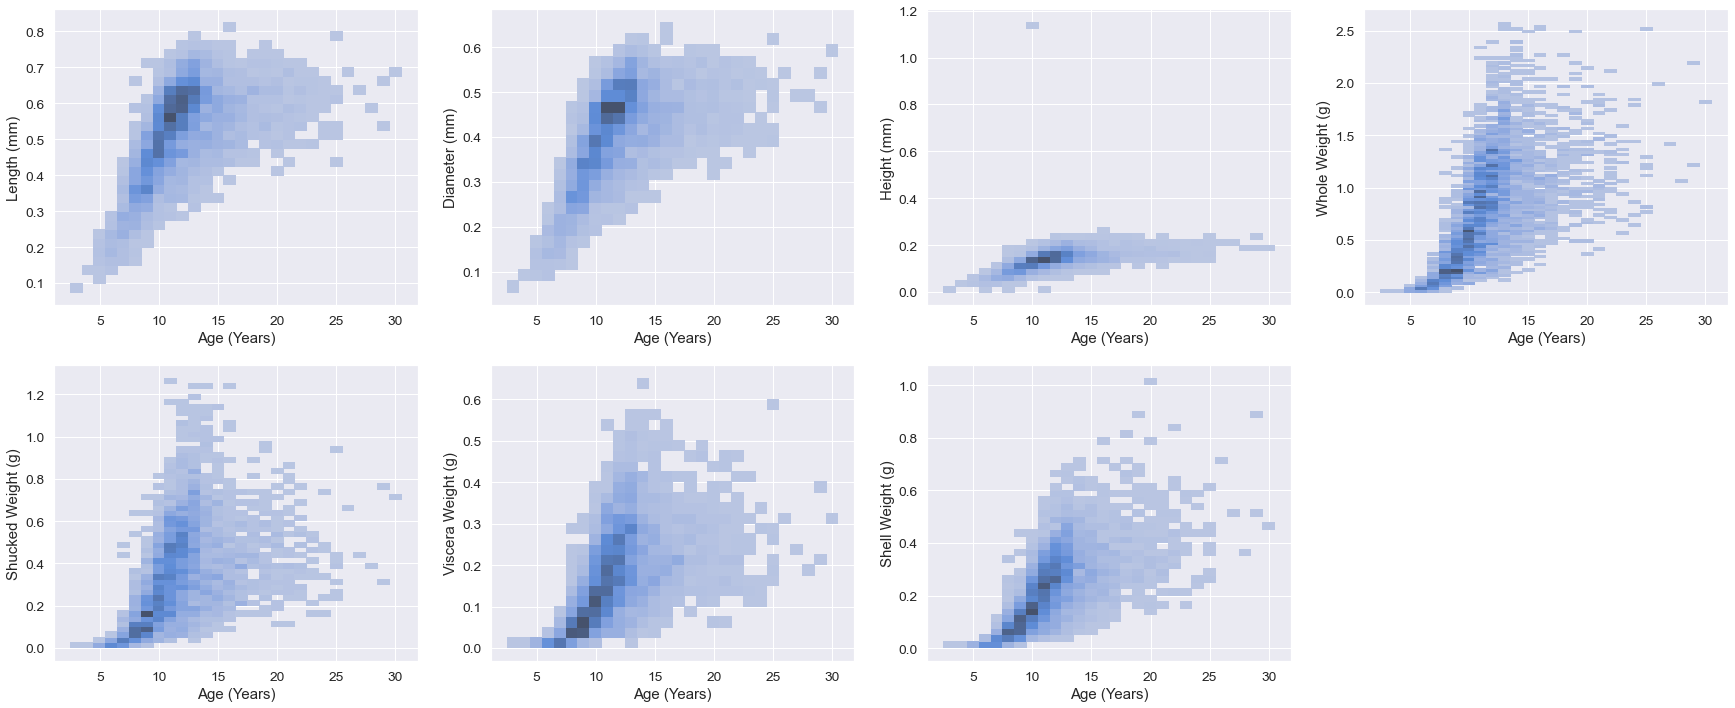

In [10]:
sns.set(rc={"figure.figsize": (30, 12)}, font_scale=1.25)

fig, axs = plt.subplots(nrows=2, ncols=4)

sns.set_theme(style="whitegrid")


for i, column in enumerate(train_df1.drop(columns=["Sex"]).columns):
    sns.histplot(
        x="Age (Years)",
        y=column,
        data=train_df1,
        binwidth=(1, 0.025),
        ax=axs[(i // 4, i % 4)],
    )


fig.delaxes(axs[1, 3])

> From the 2D histogram plot, we can see that the target `Age` seems to be positively correlated with all the numerical features.

### 1.4 Exploration of all features:

#### 1) Distribution

> First, let's have a look at the distribution of the values of all features (numerical)

From the distribution plots below, we can see that all features values are not normally distributed. There are some outliers for the `Height` value, but we will exclude outliers from training dataset before building models. The feature "Whole Weight" distributes from 0 to 2.5, which is a wider range than other features. Other features distribute from 0 to around 1. According to the dataset information on the UCI Machine Learning Repository website, the ranges have been scaled by dividing by 200. Thus, we are going to use the numerical values as our model input, not change the scale.

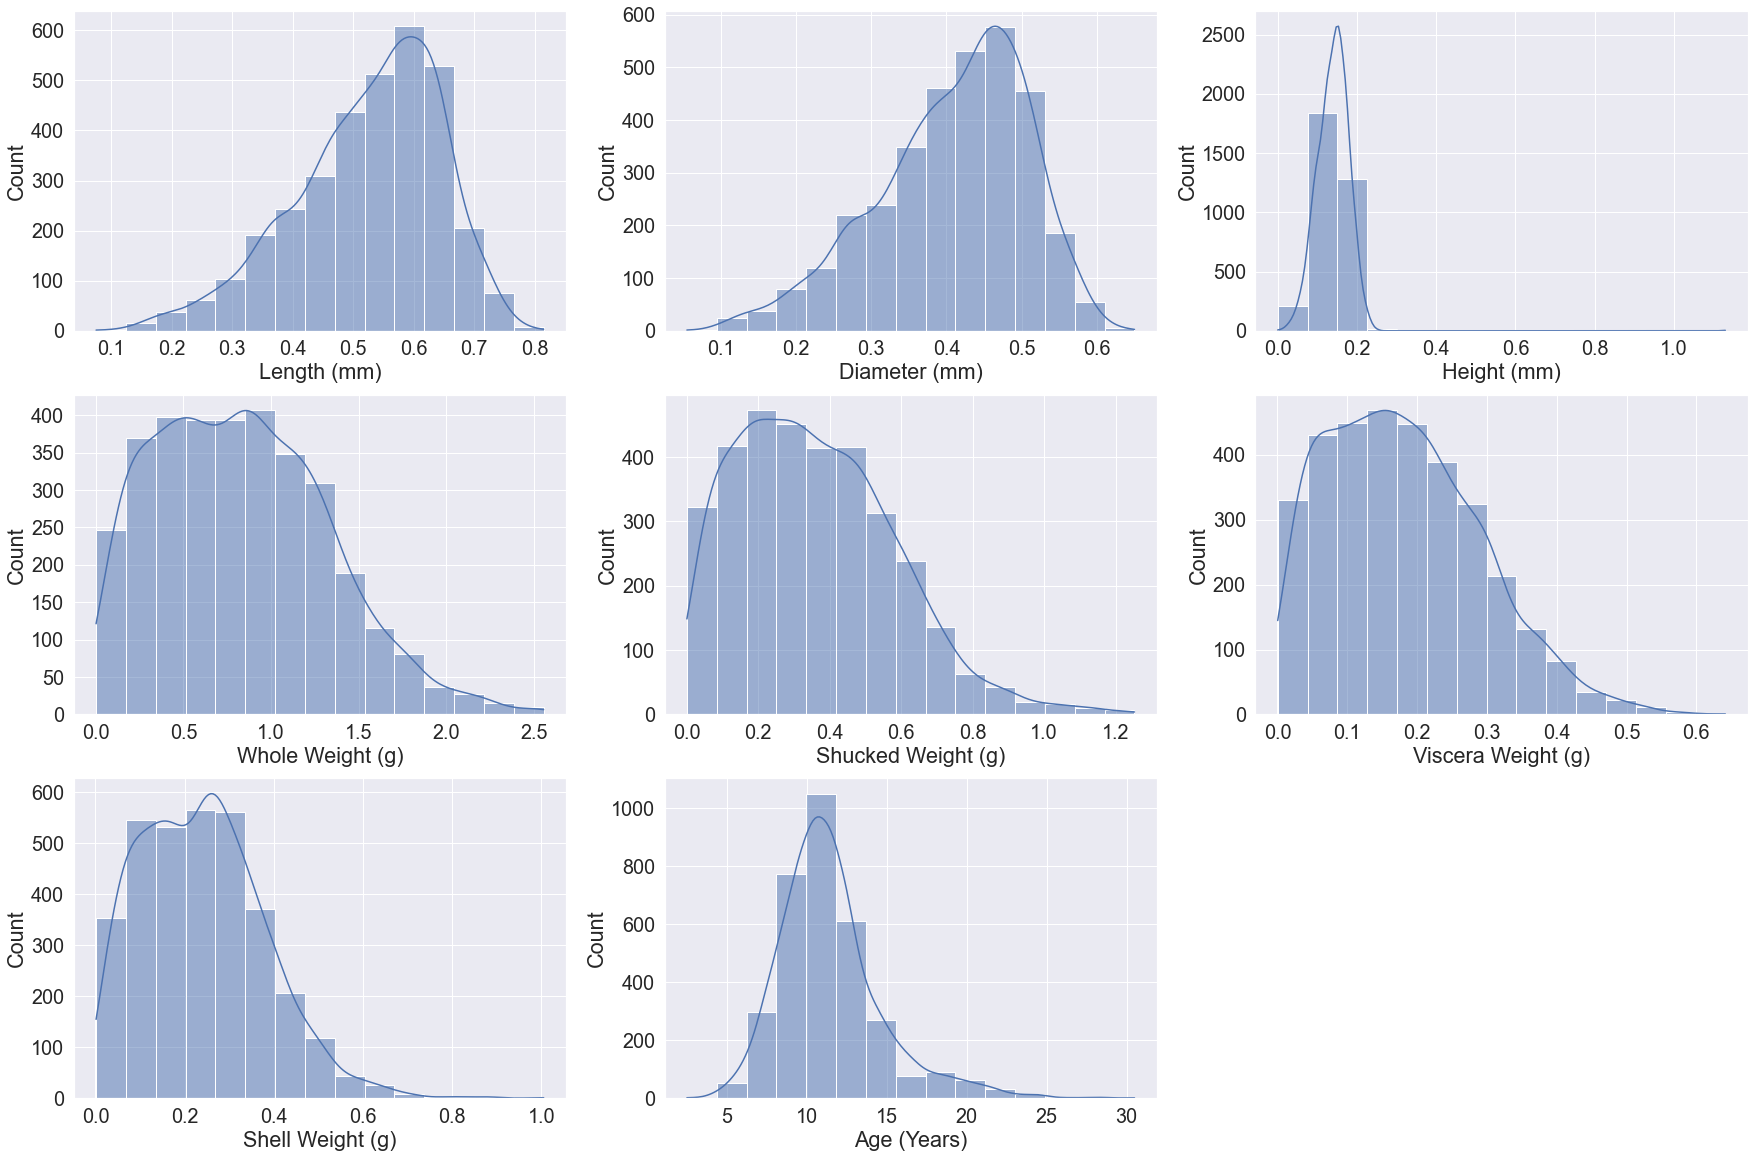

In [33]:
sns.set(rc={"figure.figsize": (30, 20)}, font_scale=1.8)
fig, axs = plt.subplots(nrows=3, ncols=3)
sns.set_theme(style="whitegrid")

for i, column in enumerate(train_df1.drop(columns=["Sex"]).columns):
    sns.histplot(train_df1[column], kde=True, bins=15, ax=axs[(i // 3, i % 3)])

fig.delaxes(axs[2, 2])

#### 2). Pairplot of Numerical Columns

> From the pairplot below, we see that all numerical features have a positive relationship between each other. We are going to use all features as our model input. 

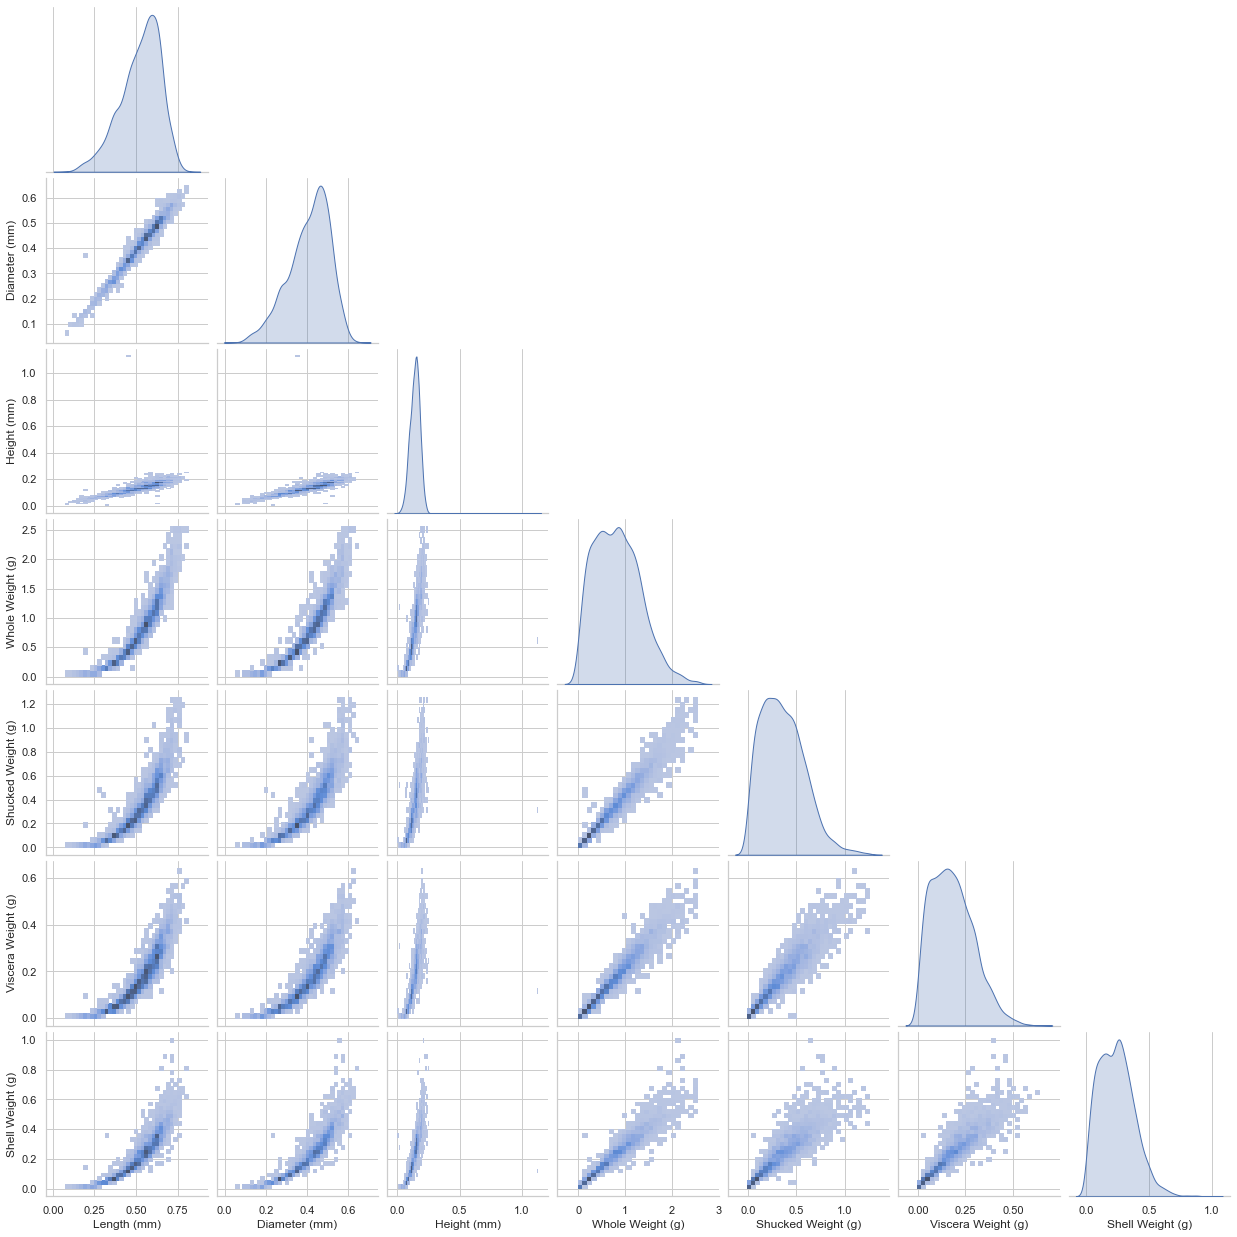

In [12]:
sns.pairplot(
    train_df1,
    vars=list(train_df1.columns)[1:-1],
    kind="hist",
    diag_kind="kde",
    corner=True,
)

#### 3). Correlation Plot

> From the correlation plot below, we can see that the `shell weight` is the feature that is most correlated to the target `Age` because the correlation value is largest among all features. 

<AxesSubplot:>

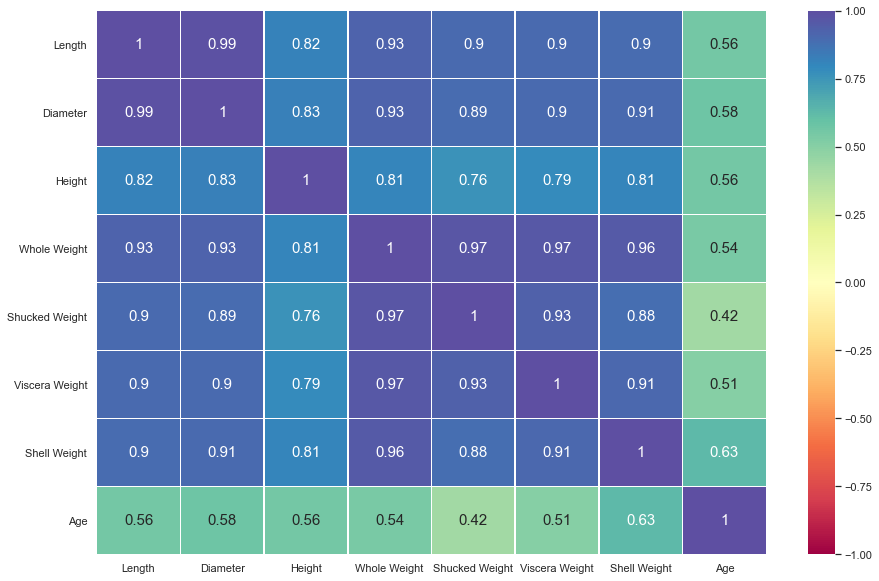

In [13]:
sns.set(rc={"figure.figsize": (15, 10)})
num_data = train_df[list(train_df.columns)[1:]]
ax = sns.heatmap(
    num_data.corr(),
    annot=True,
    annot_kws={"fontsize": 15},
    vmin=-1,
    vmax=1,
    cmap="Spectral",
    linewidths=0.5,
)
ax

#### 4). Numerical Columns conditioned on 'Sex'

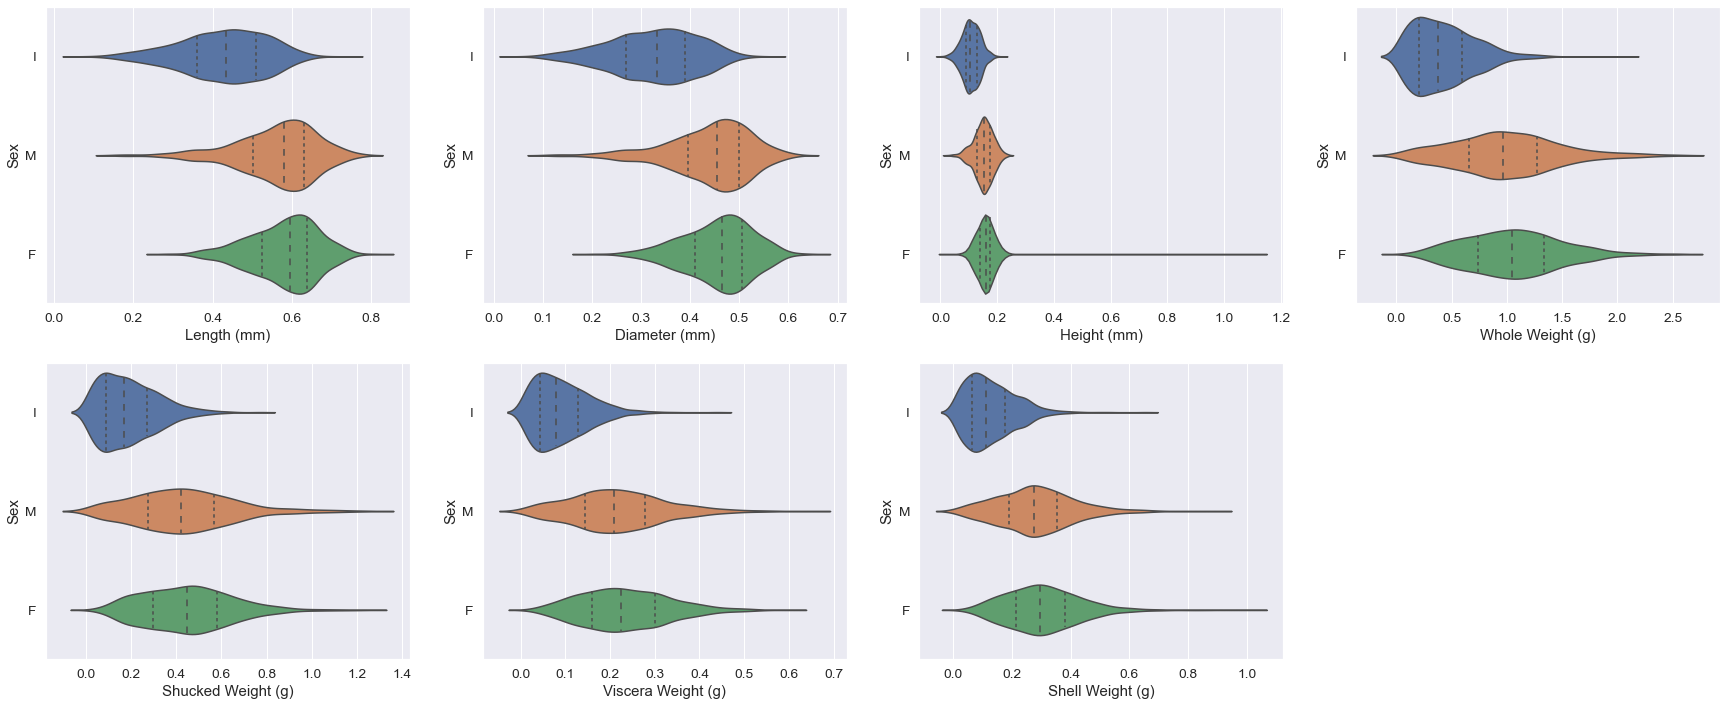

In [14]:
sns.set(rc={"figure.figsize": (30, 12)}, font_scale=1.25)

fig, axs = plt.subplots(nrows=2, ncols=4)

sns.set_theme(style="whitegrid")


for i, column in enumerate(train_df1.drop(columns=["Sex"]).columns):
    sns.violinplot(
        y="Sex", x=column, data=train_df1, inner="quartile", ax=axs[(i // 4, i % 4)],
    )


fig.delaxes(axs[1, 3])